# Ford GoBike System Data Exploration 
## by Abdullah Majed

## Preliminary Wrangling

includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')
base_color = sb.color_palette()[0]
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- start_station_name, end_station_name, member_birth_year, member_gender, columns has missing values we will drop them since they are not huge amount of the data
- start_time, end_time, member_birth_year, user_type, member_gender columns has Erroneous datatypes 

In [3]:
# drop null values
df.dropna(inplace=True) 

In [4]:
# convert datatype
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.member_birth_year = df.member_birth_year.astype(int)
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Feature Engineering
- add age column
- add day of the week column
- add hour of a day column

we can not add month column because all the data from Febuary

In [5]:
# calculate the age
df['age'] = df.start_time.dt.year - df.member_birth_year

In [6]:
# crate weekdays categorie type
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
ordered_days = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)

# extract day from date column
df['day'] = df.start_time.dt.day_name().astype(ordered_days)

In [7]:
df['start_hour'] = df.start_time.dt.hour

Note That the distance is between start_station and end_station, it dose not calculate the actual distance that the customer traveled, for example there is 0 distance that mean the customer returend the bike to the same station

In [11]:
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   
5            -122.405950     5200  Subscriber               1959   

  member_gender bike_share_for_all_trip  age       day  start_hour  
0          Male                      No   35  Thursday          17  
2          Male                      No   47  Thursday          12  
3         Other                      No   30  Thursday          17  
4          Male                     Yes   45  Thursday          23  
5          Male                      No   60  Thursday          23

In [12]:
# descriptive statistics for numeric variables
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean      704.002744        139.002126               37.771220   
std      1642.204905        111.648819                0.100391   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       510.000000        104.000000               37.780760   
75%       789.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      238.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year            age  \
count          174952.000000  174952.000000      174952.000000  174952.000000   
mean             -122.351335    4482.587555        1984.803135      34.196865   
std                 0.117294    1659.195937          10.118731      10.118731   
min              -122.453704      11.000000        1878.000000      18.000000   
25%              -122.411647    3799.000000        1980.000000      27.000000   
50%              -122.397437    4960.000000        1987.000000      32.000000   
75%              -122.286533    5505.000000        1992.000000      39.000000   
max              -121.874119    6645.000000        2001.000000     141.000000   

          start_hour  
count  174952.000000  
mean       13.456165  
std         4.734282  
min         0.000000  
25%         9.000000  
50%        14.000000  
75%        17.000000  
max        23.000000

In [19]:
# saving the cleaned version 
df.to_csv('201902-fordgobike-tripdata_cleaned.csv', index=False)

### What is the structure of your dataset?

There are 174952 rows in the dataset with 16 features, Most variables are qualtitive in nature

### What is/are the main feature(s) of interest in your dataset?

The duratin_sec is the main feature we want to look at

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that hour of the day will have the strongest effect on duration time, hours in the middle of the day will increases the duration, And i think user_type, age, day, will have effects on the duration, and 

## Univariate Exploration



### How long does the average trip take?

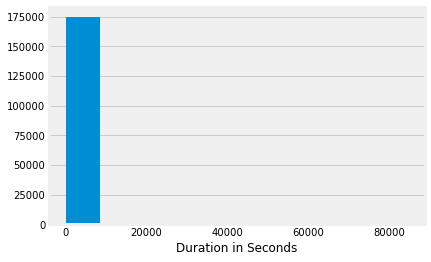

In [115]:
# start with a standard histogram plot
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration in Seconds')
plt.grid(axis = 'x')

looks like there is outliers that make the distribution not clear, we have to limit the xaxis

In [14]:
# lets look at statiscal description
df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [15]:
# finding where most of the data locate
df[df.duration_sec < 2000].shape[0] / df.shape[0]

0.9731583520051214

In [114]:
# specified x-limit and bin sizes
binsize = 60
bins = np.arange(0, df.duration_sec.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlabel('Duration in Seconds')
plt.xlim(0, 2000)
plt.grid(axis = 'x')

That is much better we can see that most customers spend between 200 to 600 seconds, there's a long tail in the distribution, so let's try a log scale 

In [17]:
np.log10(df.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

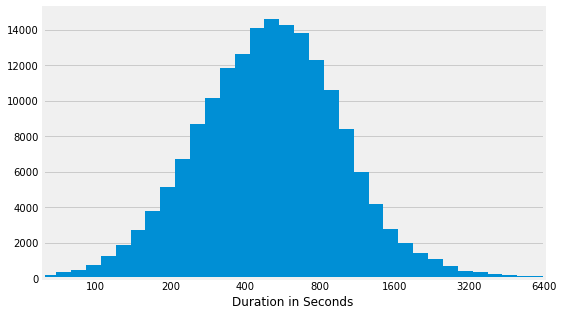

In [20]:
# log scale histogram 
binsize = 0.06
bins = 10 ** np.arange(1.78, 4.92+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([100, 200, 400, 800, 1600, 3200, 6400, 12800], [100, 200, 400, 800, 1600, 3200, 6400, 12800])
plt.xlabel('Duration in Seconds')
plt.xlim((61, 6400))
plt.grid(axis = 'x')

Duration has a long-tailed distribution, with a lot of rides on the low duration end, and few on the high duration end. When plotted on a log-scale, the duration distribution looks normal, with one peak between 500 and 650.

### When are most trips taken in terms of day of the week ?

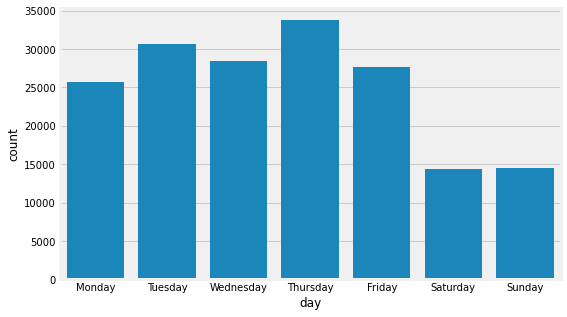

In [99]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='day', color=base_color);

in general most rides come in week weekday rather than weekend, Thursday has the most rides almost 35000

### When are most trips taken in terms of hour of day ?

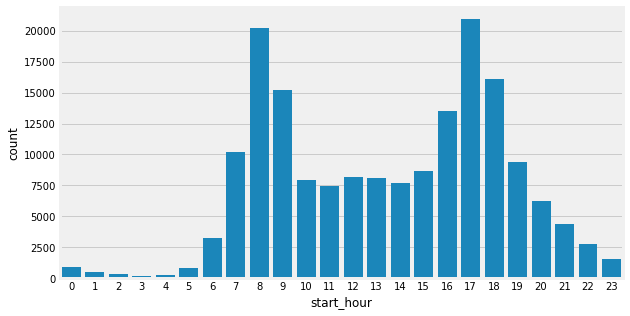

In [19]:
# plot the distripution of start_hour
plt.figure(figsize=[9, 5])
sb.countplot(data=df, x='start_hour', color=base_color);

Hour has bimodal distribution, we can see that people love ride bike early in the morinig peak at `8 AM`, then it goes down until sunset it start increases again the second peak at `6 PM`.

### What is the average age of our users ?

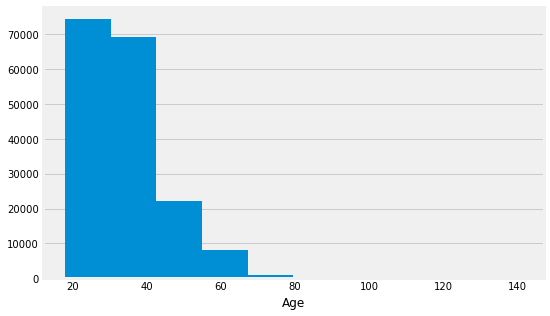

In [100]:
# start with a standard histogram plot
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age')
plt.xlabel('Age')
plt.grid(axis ='x')

Same as duration there is outliers that make the distribution not clear, we have to limit the xaxis

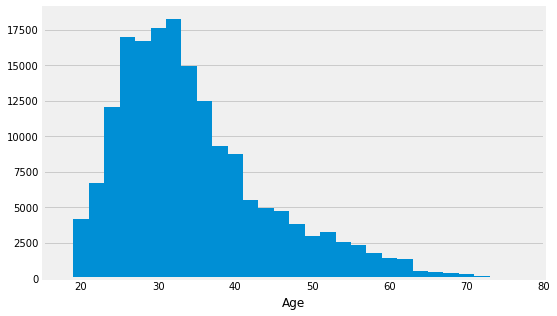

In [101]:
# specified x-limit and bin sizes
binsize = 2
bins = np.arange(15, df.age.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins=bins)
plt.xlabel('Age')
plt.xlim(15, 80)
plt.grid(axis ='x')

In [102]:
np.log10(df.age.describe())

count    5.242919
mean     1.533986
std      1.005126
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64

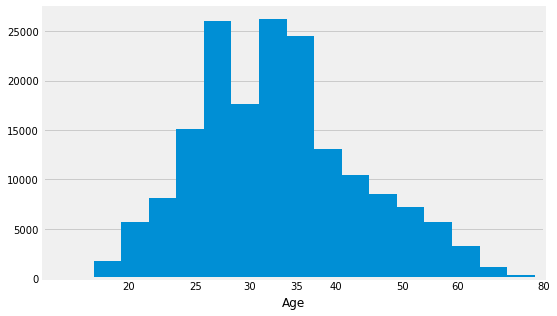

In [105]:
# log scale histogram 
binsize = 0.04
bins = 10 ** np.arange(1.25, 2.14+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins=bins)
plt.xlabel('Age')
plt.xscale('log')
plt.xticks([20, 25, 30,35, 40, 50, 60,80], [20, 25, 30,35, 40, 50, 60,80])
plt.xlim(15, 80)
plt.grid(axis ='x')

Age has a long-tailed distribution, with a lot of rides by young people, and few on by old people. When plotted on a log-scale, the age distribution looks roughly bimodal, most of people between 27 and 35

### What is the most type of the users ?

In [25]:
# plot the pie chart
sorted_counts = df.user_type.value_counts()

plt.subplots(figsize=(5,5)) 
explode = (0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});


most of the users are subscribers, only `9%` are customers


### What is the most gender of the users ?

In [106]:
# plot the pie chart
sorted_counts = df.member_gender.value_counts()

plt.subplots(figsize=(5,5)) 
explode = (0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sorted_counts, explode=explode, labels=sorted_counts.index, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});


most of the users are males, only `23%` are females, and `2%` other

### What is the 10 most stations selected by users ?

In [27]:
start_station = df.start_station_name.value_counts().sort_values(ascending=False)[:10]

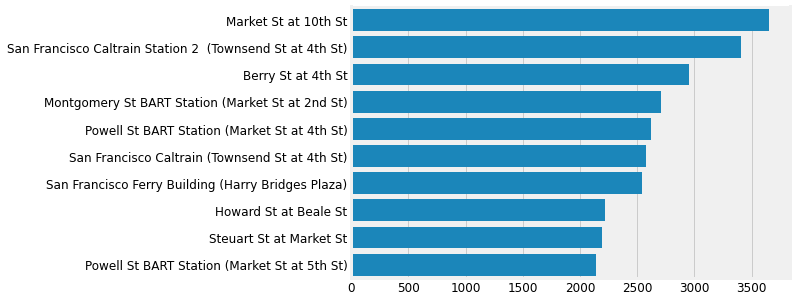

In [28]:
# plot 10 start station by rides
plt.subplots(figsize=(7,5)) 
# plt.title('10 Most Start Station Selected by Users', fontsize=15)
sb.barplot(x=start_station, y=start_station.index, order=start_station.index, color=base_color);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.xlabel('');
plt.ylabel('');

In [29]:
end_station = df.end_station_name.value_counts().sort_values(ascending=False)[:10]

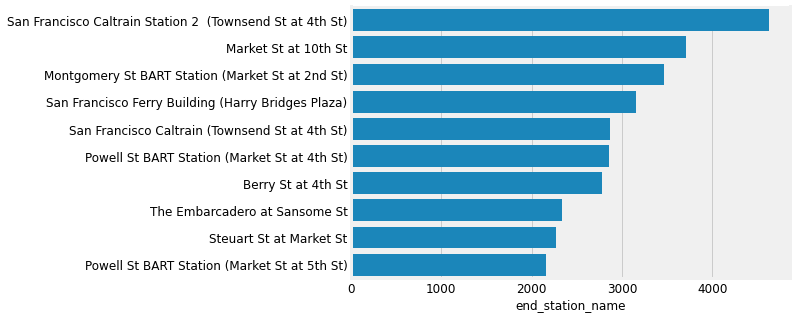

In [30]:
# plot 10 end station by rides

plt.subplots(figsize=(7,5)) 
# plt.title('10 Most End Station Selected by Users', fontsize=15)
sb.barplot(x=end_station, y=end_station.index, order=end_station.index, color=base_color);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

There is similarity between most selected start and end stations, with `Caltrain Station 2 (Twonsend St at 4th St` and `Market St at 10th St` as the most favorite stations

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal, with one peak between 450 and 600
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The hour variable looks bimodal, with peek at `8 AM` in the morining, and another peek at `6 PM` before sunset
The age variable took on a large range of values, Under log the transformation, the data looked bimodal.

## Bivariate Exploration

### When are most duration average in terms of hour of day ?

In [119]:
# barchart for hours vs duration
with plt.rc_context({'lines.linewidth': 1.5}):
    duration_mean = df.groupby('start_hour')['duration_sec'].mean()
    plt.subplots(figsize=(8, 5)) 
    sb.barplot(x=duration_mean.index, y=duration_mean, color= base_color)

This plot show that `3 AM` is the most duration average, but let's see the same plot after we remove the duration outlires.

In [9]:
# method return mask removing outliers
from scipy import stats
def no_outlires(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    z = np.abs(stats.zscore(df))
    no_outlires = (z < 3).all(axis=1)
    return no_outlires

In [121]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

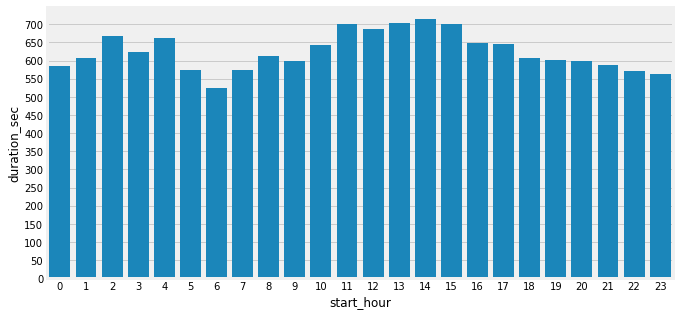

In [135]:
# barchart for average duration vs hours without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    duration_mean = no_outlires_df.groupby('start_hour')['duration_sec'].mean()
    plt.subplots(figsize=(10, 5)) 
    sb.barplot(x=duration_mean.index, y=duration_mean, color= base_color)
    plt.yticks(np.arange(0, 701, 50))

The trend change a lot, now we can see on average people spend more time riding the bike when they start between `11 AM` and `4 PM`, and the lowest duration average when they start around `6 AM`

### What is the relation between age and bike riding time ?

In [35]:
bin_edges = np.arange(df.age.min(), df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 

# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(df.age, bin_edges, include_lowest = True)
duration_mean = df.duration_sec.groupby(age_binned).mean()

In [36]:
# line plot for age vs duration
plt.subplots(figsize=(10,5)) 
plt.errorbar(x=bin_centers, y=duration_mean)
plt.xticks(np.arange(df.age.min(), df.age.max() + 5, 5));

There is a gap in the line when no data available let's try when we remove the outliers from age column

In [124]:
# remove outliers from duration and age

no_outlires_df = df[no_outlires(df[['duration_sec', 'age']])]
no_outlires_df.shape[0] / df.shape[0]

0.9861619186977

In [125]:
bin_edges = np.arange(no_outlires_df.age.min(), no_outlires_df.age.max() + 3, 3)
bin_centers = bin_edges[:-1] 

# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(no_outlires_df.age, bin_edges, include_lowest = True)
duration_mean = no_outlires_df.duration_sec.groupby(age_binned).mean()

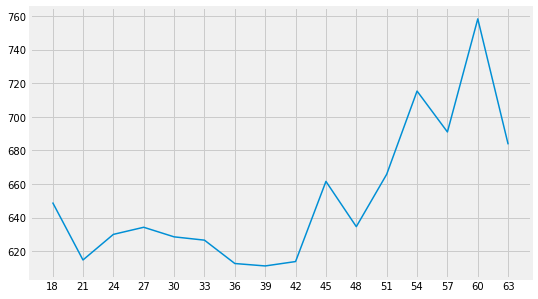

In [128]:
# line plot for age vs duration without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    plt.errorbar( x = bin_centers, y=duration_mean);
    plt.xticks(np.arange(18, bin_centers.max()+ 1, 3))

This shows very diffrent graph, it looks like people between 45 and 63 age spend more time riding bikes.

### What hour of the day oldest people go out for riding bikes ?

In [132]:
# line plot for average age vs hours without outliers
age_mean = no_outlires_df.groupby('start_hour')['age'].mean()
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(10, 5)) 
    sb.barplot( x = age_mean.index, y=age_mean, color=base_color);

looks like old people like to ride at `4 AM`

Next we have duration vs day of the week 

In [41]:
# method to plot three diffrent plots

def draw_three_plots(x_data, y_data, rotation = 0):
    plt.figure(figsize = [20, 5])
    base_color = sb.color_palette()[0]

    # left plot: violin plot
    plt.subplot(1, 3, 1)
    sb.violinplot( x=x_data, y=y_data, inner="quartile",
                  color = base_color)
    plt.xticks(rotation = rotation); # include label rotation due to small subplot size

    # center plot: box plot
    plt.subplot(1, 3, 2)
    sb.boxplot( x=x_data, y=y_data, color = base_color)
    plt.xticks(rotation = rotation);

    # right plot: adapted bar chart
    plt.subplot(1, 3, 3)
    sb.barplot( x=x_data, y=y_data, color = base_color)
    plt.xticks(rotation = rotation)
    plt.show();

### When are most duration average in terms of day of the week ?

In [42]:
draw_three_plots(df.day, df.duration_sec, 25)

thers is a lot of outliers so let's try remove some of them to make the plots clearer

In [43]:
# remove duration outliers
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

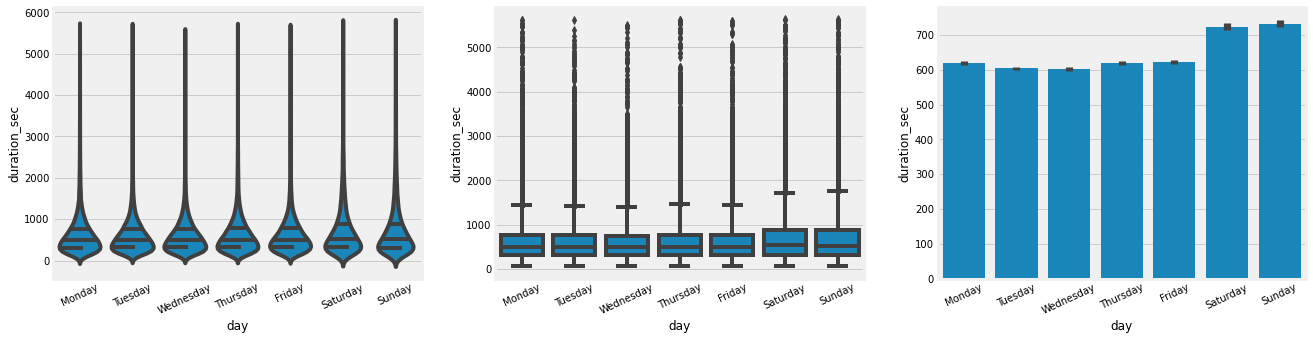

In [44]:
draw_three_plots(no_outlires_df.day, no_outlires_df.duration_sec, 25)

it is pretty close but it seems people spend more time riding bikes on weekends

### What user type spend more time riding bikes ?

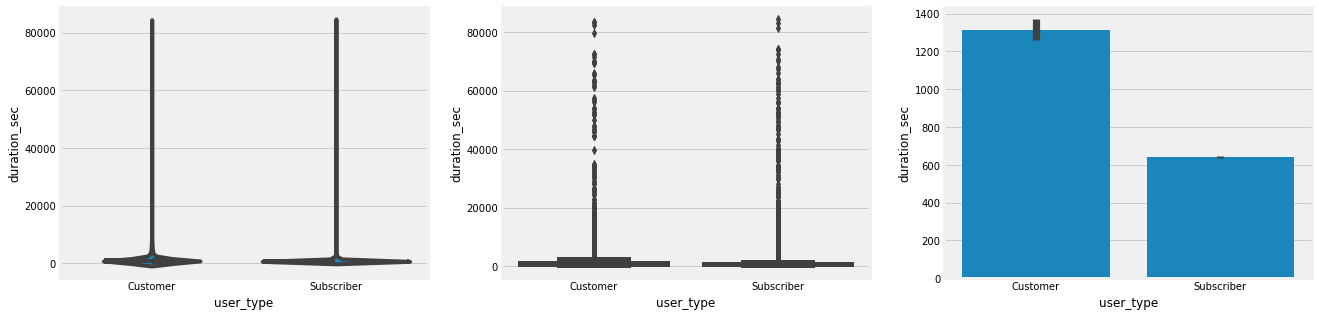

In [45]:
draw_three_plots(df.user_type, df.duration_sec)

Seem problem there is a lot of outliers

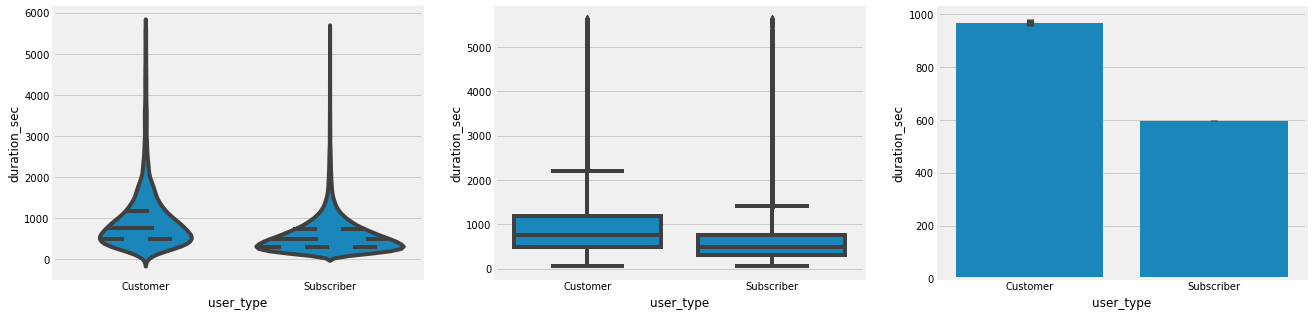

In [46]:
draw_three_plots(no_outlires_df.user_type, no_outlires_df.duration_sec)

On average Customers spend `250 sec` more than subscribers.

### what gender spend more time riding bikes?

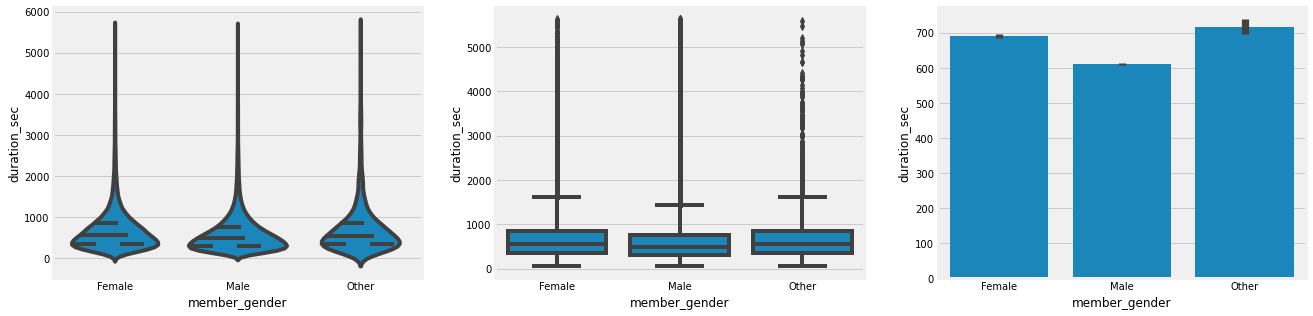

In [47]:
draw_three_plots(no_outlires_df.member_gender, no_outlires_df.duration_sec)

Others gender spend most time riding bike with average excede `700 sec`, females come next with average slightly below `700 sec`, lastly males is the lowest with average close to `600 sec`

Now let's see age vs day of week, age vs user_type, age vs gender

### What day of the week oldest people go out for riding bikes ?

In [48]:
draw_three_plots(df.day, df.age, 25)

In [137]:
# remove duration outliers
no_outlires_df = df[no_outlires(df.age)]
no_outlires_df.shape[0] / df.shape[0]

0.9903973661347112

In [139]:
draw_three_plots(no_outlires_df.day, no_outlires_df.age, 25)

They are pretty close, but it seems they prefer weekdays more

### What user type are the oldest ?

In [140]:
draw_three_plots(df.user_type, df.age)

they are pretty close, Customer has the most outlier with 140 years old

### What gender are the oldest ?

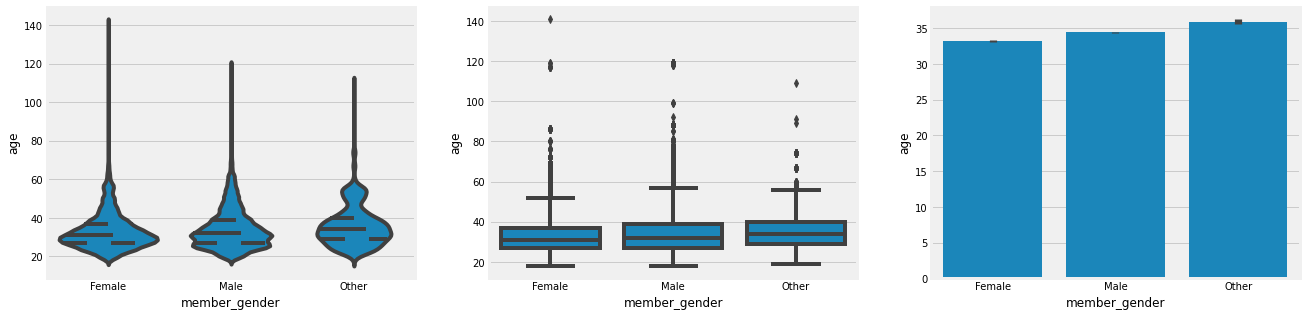

In [50]:
draw_three_plots(df.member_gender, df.age)

Although there is more outliers in male and female, it seems other gender has oldest avearge age, let's see that after we remove the outliers

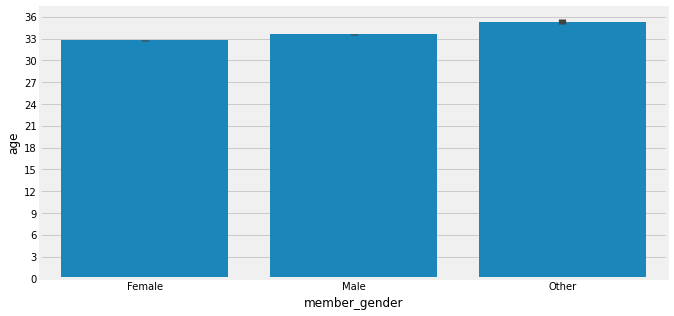

In [146]:
plt.subplots(figsize=(10, 5)) 
sb.barplot( data=df[df.age < 60 ], x='member_gender', y='age', color = base_color)
plt.yticks(np.arange(0, 37, 3));

### What day each user type perfer ?

In [52]:
plt.subplots(figsize=(7, 5)) 
sb.countplot(data = df, x = 'day', hue = 'user_type');

This shows the count it appear that Subscribers is much more than Customers, but that dose not answer our question we need to look to the ratio of gender in each day.

In [147]:
# this method will help us compute the ratio column
def compute_ratio(row, column_name, list_of_sum):
    
    return row['count'] / list_of_sum[row[column_name]]

In [150]:
count_user_type_day = df.groupby(['day', 'user_type']).size().reset_index(name="count")
# get the list of sum for each user type
user_type_sum = count_user_type_day.groupby('user_type')['count'].sum()
# compute each ratio
count_user_type_day['ratio'] = count_user_type_day.apply(lambda row: compute_ratio(row, 'user_type', user_type_sum), axis=1)

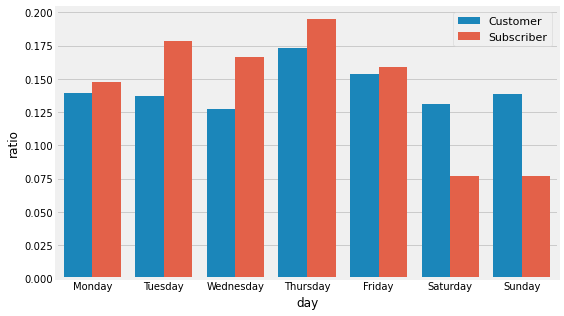

In [151]:
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = count_user_type_day, x = 'day', y='ratio', hue = 'user_type');
plt.legend(fontsize = 11);

This barchart dose not show counts, instead it shows ratio of user_type count of each day to the sum of all days.

now we can see that Subscriber perfer to ride on weekdays more than Customers, but Customers perfer to ride on weekends more

### What day each gender perfer ?

In [59]:
count_member_gender_day = df.groupby(['day', 'member_gender']).size().reset_index(name="count")

In [60]:
# get the list of sum for each user type
member_gender_sum = count_member_gender_day.groupby('member_gender')['count'].sum()
# compute each ratio
count_member_gender_day['ratio'] = count_member_gender_day.apply(lambda row: compute_ratio(row, 'member_gender', member_gender_sum), axis=1)

In [61]:
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = count_member_gender_day, x = 'day', y='ratio', hue = 'member_gender');
plt.legend(fontsize = 11);

There is no huge diffrence, this graph shows that all genders like to ride bikes in weekdays more than weekends

### Are there gender subscribe more than the other ?

In [152]:
count_user_type_gender = df.groupby(['member_gender', 'user_type']).size().reset_index(name="count")

In [153]:
customer_gender = count_user_type_gender.query('user_type == "Customer"')

subscriber_gender = count_user_type_gender.query('user_type == "Subscriber"')


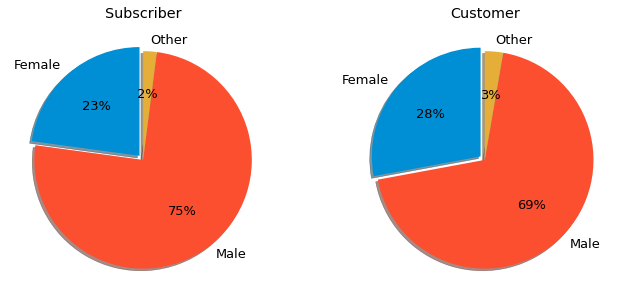

In [154]:
plt.subplots(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
explode = (0.05, 0, 0)  # only "explode" the first slice (i.e. 'Hogs')

plt.title('Subscriber')
plt.pie(subscriber_gender['count'], explode=explode, labels=subscriber_gender.member_gender, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});

plt.subplot(1, 2, 2)

explode = (0.05, 0, 0)  
plt.title('Customer')

plt.pie(customer_gender['count'], explode=explode, labels=customer_gender.member_gender, autopct='%1.0f%%',
        shadow=True, startangle=90,textprops={'fontsize': 13});

They are similar, but males are slightly less in Customer user type

### What hour each user type perfer ?

In [65]:
count_user_type_hour = df.groupby(['start_hour', 'user_type']).size().reset_index(name="count")

In [66]:
# get the list of sum for each user type
user_type_sum = count_user_type_hour.groupby('user_type')['count'].sum()
# compute each ratio
count_user_type_hour['ratio'] = count_user_type_hour.apply(lambda row: compute_ratio(row, 'user_type', user_type_sum), axis=1)

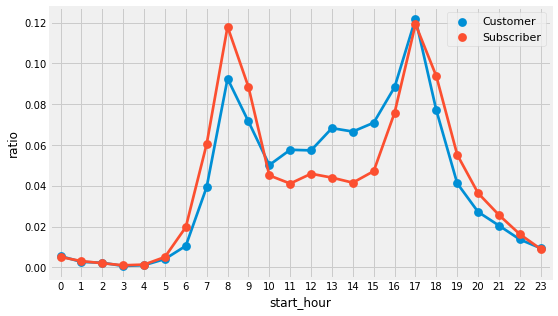

In [67]:
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    sb.pointplot(data = count_user_type_hour, x = 'start_hour', y='ratio', hue = 'user_type');
    plt.legend(fontsize = 11);
    plt.grid(axis='x')

This plot looks like the start_hour distripution, they both looks the same, but Customers ride more than subscripers at the middle of the day between `10 AM` and `4 PM`.

### What hour each gender perfer ?

In [68]:
count_member_gender_hour = df.groupby(['start_hour', 'member_gender']).size().reset_index(name="count")

In [69]:
# get the list of sum for each member gender
user_type_sum = count_member_gender_hour.groupby('member_gender')['count'].sum()
# compute each ratio
count_member_gender_hour['ratio'] = count_member_gender_hour.apply(lambda row: compute_ratio(row, 'member_gender', user_type_sum), axis=1)

In [70]:
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    sb.pointplot(data = count_member_gender_hour, x = 'start_hour', y='ratio', hue = 'member_gender');
    plt.legend(fontsize = 11);
    plt.grid(axis='x')

Again this looks like start_hour distripution, it seems there is no diffrence in start_hour with gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

i found that on average people spend more time riding the bike when they start between `11 AM` and `4 PM`, and the lowest duration average when they start around `6 AM`, also people spend more time riding on weekends, old people between 45 and 63 spend more time than young people riding bikes, On average Customers spend `250 sec` more than subscribers.
, lastly Others gender spend most time riding bike with average excede `700 sec`

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Old people like to ride bikes early in the morining around `4 AM`
i found that in weekends customers take more rides than subscripers, but in weekdays the opposite.
Customers take more rides than subscripers at the middle of the day between `10 AM` and `4 PM`.

## Multivariate Exploration

### How average duration by age group differ in each user type ?

In [85]:
# remove outliers from duration and age

no_outlires_df = df[no_outlires(df[['duration_sec', 'age']])]
no_outlires_df.shape[0] / df.shape[0]

0.9861619186977

In [86]:
bin_edges = np.arange(no_outlires_df.age.min(), no_outlires_df.age.max() + 3, 3)

# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(no_outlires_df.age, bin_edges, include_lowest = True)
duration_mean_user = no_outlires_df.groupby(['user_type', age_binned])['duration_sec'].mean().reset_index(name="duration")
bin_centers = bin_edges[:-1] 
duration_mean_user['age_centers'] = np.tile(bin_edges[:-1], 2)


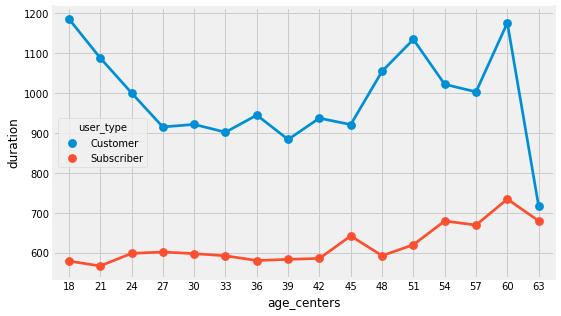

In [87]:
# line plot for age vs duration vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    sb.pointplot(data=duration_mean_user, x = 'age_centers', y='duration', hue='user_type');
    plt.grid(axis='x')

Notice that Customers from 48 to 60 has the highest durtion average.

### How average duration by age group differ in each gender ?

In [88]:
duration_mean_gender = no_outlires_df.groupby(['member_gender', age_binned])['duration_sec'].mean().reset_index(name="duration")
bin_centers = bin_edges[:-1] 
duration_mean_gender['age_centers'] = np.tile(bin_edges[:-1], 3)

In [89]:
# line plot for age vs duration vs member_gender without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    sb.pointplot(data=duration_mean_gender, x = 'age_centers', y='duration', hue='member_gender');
    plt.grid(axis='x')

in females and males we see that the highest duration start from age 48 until 60 age group.
Others line is not stable, there is a big jumb at 54 age but i assume that is because other is only 2% of the data and there is few people who is around 54 old.

### How average duration by hour differ in each user type ?

In [90]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

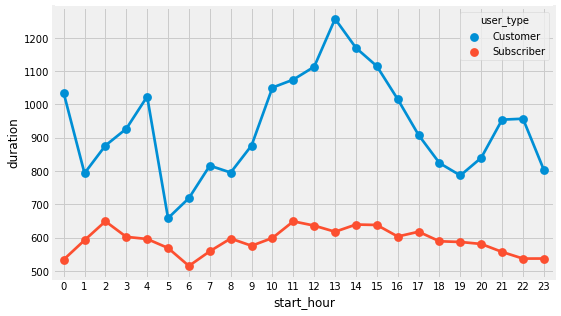

In [83]:
# line plot for average duration vs hours vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    duration_hours_user = no_outlires_df.groupby(['user_type','start_hour'])['duration_sec'].mean().reset_index(name="duration")
    sb.pointplot(data=duration_hours_user, x='start_hour', y='duration', hue='user_type')
    plt.grid(axis='x');
    

Customers really love riding more between `10 AM` and `4 PM` with duration average between `1000 sec` and `1300 sec`


### How average duration by hour differ in each gender ?

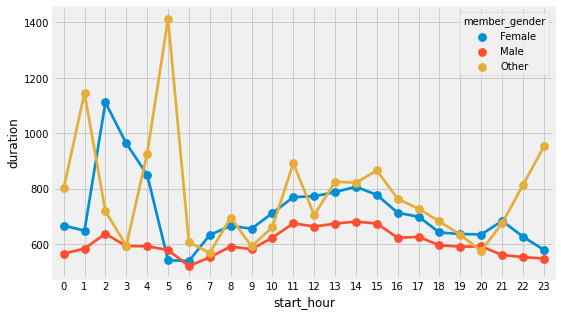

In [78]:
# line plot for average duration vs hours vs member_gender without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    duration_hours_gender = no_outlires_df.groupby(['member_gender','start_hour'])['duration_sec'].mean().reset_index(name="duration")
    sb.pointplot(data=duration_hours_gender, x='start_hour', y='duration', hue='member_gender')
    plt.grid(axis='x');

unlike males females and others love to ride more between `0 AM` and `5 AM`, but they all ride less at `6 AM` i guess this is because it is before work, then the ride duration increases for all genders and it start decrease again at `4 PM`

### How average duration by day differ in each user type ?

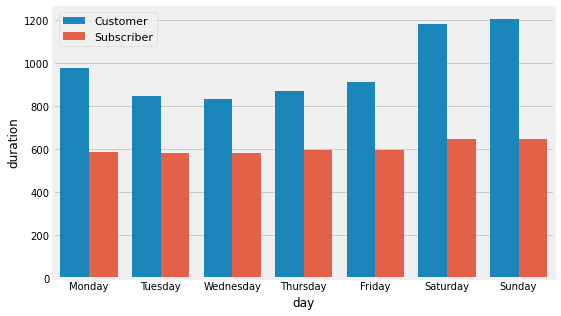

In [81]:
duration_day_user = no_outlires_df.groupby(['day', 'user_type'])['duration_sec'].mean().reset_index(name="duration")
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = duration_day_user, x = 'day', y='duration', hue = 'user_type');
plt.legend(fontsize = 11, loc='upper left');

Customers spend more time riding bikes than Subscribers everyday, also customers spend more time in weekends, subscribers have steady duration average per day

### How average duration by day differ in each gender ?

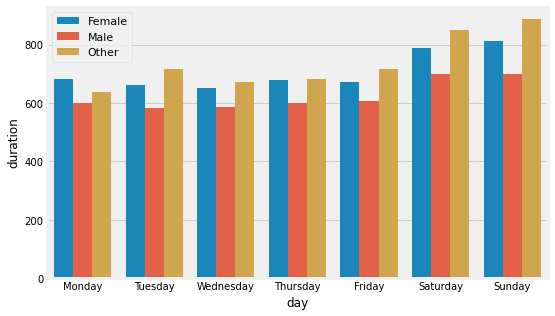

In [82]:
duration_day_gender = no_outlires_df.groupby(['day', 'member_gender'])['duration_sec'].mean().reset_index(name="duration")
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = duration_day_gender, x = 'day', y='duration', hue = 'member_gender');
plt.legend(fontsize = 11, loc='upper left');

Others spend more time riding bikes everyday except for monday females win, females comes next and males are the lowest, they all spend more time in weekends

### How average age by hour differ in each user type ?

In [91]:
no_outlires_df = df[no_outlires(df.age)]
no_outlires_df.shape[0] / df.shape[0]

0.9903973661347112

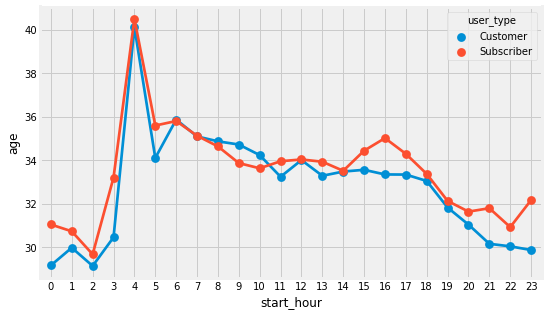

In [94]:
# line plot for average age vs hours vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    age_hours_user = no_outlires_df.groupby(['user_type','start_hour'])['age'].mean().reset_index(name="age")
    sb.pointplot(data=age_hours_user, x='start_hour', y='age', hue='user_type')
    plt.grid(axis='x');
    

looks like customers and subscribers have the same average age all day

### what about average age by gender in hours of the day ?

In [95]:
# line plot for average age vs hours vs user_type without outliers
with plt.rc_context({'lines.linewidth': 1.5}):
    plt.subplots(figsize=(8, 5)) 
    age_hours_user = no_outlires_df.groupby(['member_gender','start_hour'])['age'].mean().reset_index(name="age")
    sb.pointplot(data=age_hours_user, x='start_hour', y='age', hue='member_gender')
    plt.grid(axis='x');
    

In the plot we had earlire in bivariate exploratory `duration vs age` showed that the oldest age average we got at `4 AM`, but here we see that only male males had oldest age average at `4 AM`, this happened because male are `75%` of the data.

### How average age by day differ in each user type ?

In [97]:
duration_day_user = no_outlires_df.groupby(['day', 'user_type'])['age'].mean().reset_index(name="age")
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = duration_day_user, x = 'day', y='age', hue = 'user_type');
plt.legend(fontsize = 11, loc='lower right');

Almost identical

### what about average age by gender in days of week ?

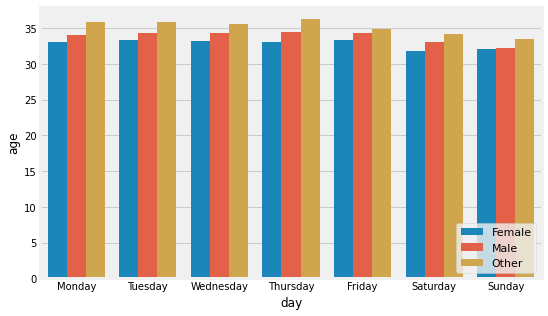

In [98]:
duration_day_user = no_outlires_df.groupby(['day', 'member_gender'])['age'].mean().reset_index(name="age")
plt.subplots(figsize=(8, 5)) 
sb.barplot(data = duration_day_user, x = 'day', y='age', hue = 'member_gender');
plt.legend(fontsize = 11, loc='lower right');

Others have the oldest age average at all days of the week, males comes next, females are the lowest

### What user type and gender combination has the most duration average ?

In [10]:
no_outlires_df = df[no_outlires(df.duration_sec)]
no_outlires_df.shape[0] / df.shape[0]

0.9956959623210938

In [14]:
no_outlires_df.duration_sec.mean()

632.3626025407723

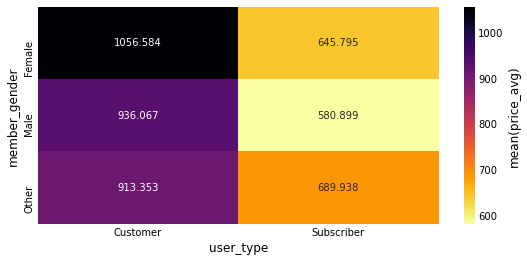

In [13]:
plt.figure(figsize=[8,4])
duration_means = no_outlires_df.groupby(['user_type', 'member_gender'])['duration_sec'].mean()
duration_means = duration_means.reset_index(name = 'duration_sec')
duration_means = duration_means.pivot(index = 'member_gender', columns = 'user_type',
                            values = 'duration_sec')
sb.heatmap(duration_means, annot = True, fmt = '.3f', cmap='inferno_r',
           cbar_kws = {'label' : 'mean(price_avg)'});

Female Customers have the highest duration average with `1057 sec`, male subscribers have the lowest with `581 sec`

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Female Customers have the highest duration average with `1057 sec`, male subscribers have the lowest with `581 sec`we Noticed that Customers from 48 to 60 age group has the highest durtion average.
also in females and males we see that the highest duration start from age 48 until 60 age group.
Customers really love riding more between `10 AM` and `4 PM` with duration average between `1000 sec` and `1300 sec`
unlike males females and others love to ride more between `0 AM` and `5 AM`

### Were there any interesting or surprising interactions between features?

only males had oldest age average at `4 AM`, they affect the overal average because male consist `75%` of the data


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!